


# Plateforme Automatisée de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : ObsInfo2309-Annotation niveau paragraphe

---

# Observations et environnement
---

## Environnement

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [4]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

In [5]:
sheet_id = '1rVgAnv7FwFqWUUmjE72AP_YEmf9v6DaZ-_20jZ6MKTg'
range_name = 'Sélection'

df_obsinfo2307 = gs.read_df(sheet_id,range_name)
df_obsinfo2307

,url_h,url_labelizer,title,comment
0,c13175936764a345ec21bc398fe750a41496078e,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,très long mais bien formaté
1,0552561b3c46f64febfbc3a77c301f085a98b966,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",source visible
2,361a904687dd4b1abb189717de7341ce162d21c7,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,ok
3,433b403d386d5eba5dff7d45044cdb0fe7862972,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",source visible
4,3494ad0901a73fc6ceb2f74ac4ac1930af42b363,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",ok
...,...,...,...,...
95,d04a526d60fa6d67f61c7abcaf45092b8217a24d,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,bizarre
96,14ed4715949dc7767359674df1a076bb1e0e417b,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,donne la source
97,2841a1db742a25419c20d4a56eb65d8c05d92f65,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,ok
98,7f8a6372ed4084fc88263c03e3b9186f082e2162,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,donne la source


In [6]:
import patat.util.file

filename = 'data/prod/230713-Corpus.pickle'

df_corpus = patat.util.file.pickle_load(filename)

In [7]:
import patat.db.article_db
article_db = patat.db.article_db.ArticleDb()
df_corpus = article_db.df().copy()

In [8]:
import patat.util.text

In [9]:
article_db.get_article_data_h('3494ad0901a73fc6ceb2f74ac4ac1930af42b363')

{'url': 'https://lesakerfrancophone.fr/selon-ubs-les-proprietes-dassurance-tant-de-fois-eprouvees-brillent-plus-que-jamais',
 'site': 'lesakerfrancophone.fr',
 'title': 'Selon UBS, les «\xa0propriétés d’assurance tant de fois éprouvées\xa0» de l’or brillent plus que jamais',
 'article': '',
 'author': 'jmarti',
 'date': 'mars 23, 2022',
 'tags': '[]',
 'paragraphs': ['Par Birch Gold Group − Le 17 février 2022 − Source birchgold.com',
  'Il y a peu, Elliot Smith, de CNBC, a exploré la résilience du prix de l’or au cours des dernières semaines de volatilité sur le marché des actions et les hausses des taux du Trésor. En règle générale, les niveaux de prix de l’or sont fortement affectés par deux forces — les taux des obligations, et le dollar index.',
  'Il y a peu, les taux de Trésor sur une durée de 10 ans ainsi que le dollar index ont monté par rapport à leur position restée basse des mois durant. Si l’on s’en fie à l’historique, une montée des taux pratiqués par le Trésor présente un

In [ ]:
df_corpus[df_corpus['url_h']=='3494ad0901a73fc6ceb2f74ac4ac1930af42b363']

In [ ]:
df_obsinfo2307 = pd.merge(df_obsinfo2307['url_h'],df_corpus)

In [ ]:
df_obsinfo2307

In [ ]:
df_obsinfo2307['num_article']=df_obsinfo2307.index

In [ ]:
parags=[] 
for index,row in df_obsinfo2307.iterrows():
    parags.append({
        'url': row['url'],
        'url_h': row['url_h'],        
        'num_article': row['num_article'],
        'num_parag': 0,
        'paragraph': row['title'],
    })
    for i,p in enumerate(row['paragraphs']):
        parags.append({
            'url': row['url'],
            'url_h': row['url_h'],        
            'num_article': row['num_article'],
            'num_parag': i+1,
            'paragraph': p,
        })

In [ ]:
df_parag = pd.DataFrame(parags)

In [ ]:
df_parag

In [ ]:
df_parag['c_count']=df_parag['paragraph'].apply(len)

In [ ]:
sns.displot(df_parag,x='c_count')

In [ ]:
df_parag_shuffle = df_parag.sample(frac=1,random_state=_rs)

In [ ]:
df_parag_shuffle

In [ ]:
df_parag.to_csv('data/tmp/230908-ObsInfo2309Prepa.csv',index=False)

In [ ]:
df_parag_shuffle.to_csv('data/tmp/230919-ObsInfo2309Shuffle.csv',index=False)

# Récupération sélection

In [17]:
df_selection = pd.read_pickle('data/tmp/230925-ObsInfo2309Selection.pkl')

In [18]:
df_selection[df_selection['abstract'].notna()]

,title,accord,url_h,url,site,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count,predict_infox
0,Ursula von der Leyen menace les Italiens à la ...,0.155556,ca79473bdf0650246530848ccc5e0672d3c6af4f,https://lalettrepatriote.com/ursula-von-der-le...,lalettrepatriote.com,"« Nous verrons le résultat du vote en Italie ,...",Didier Dewitte,,[],[« Nous verrons le résultat du vote en Italie ...,,,NaN,2,0.5
1,L’avortement médicalement assisté ne sauve pas...,0.244444,1c3945456497c17700557d470a7ae7e26d435140,https://lesalonbeige.fr/lavortement-medicaleme...,lesalonbeige.fr,Intéressante analyse parue sur IFamNews :\nDep...,Par Michel Janva,26 mai 2023,[Culture de mort : Avortement],"[Intéressante analyse parue sur IFamNews :, De...",2023-05-26T18:25:41+02:00,,NaN,12,0.5
4,Les projets de démantèlement de la Russie,0.288889,2a5478f5ef32fabbc7f8421cdc7f944a1f3e5c59,https://reseauinternational.net/les-projets-de...,reseauinternational.net,La revue Conflits vient de publier une traduct...,,,"[États-Unis, OTAN/Russie, Russie, Faits d'actu...",[La revue Conflits vient de publier une traduc...,,,NaN,14,0.5
87,Le Sinn Fein en tête en Irlande du Nord,0.911111,dbd68570a4fbf701d6ab47263a965b4e597ff9df,https://lesalonbeige.fr/le-sinn-fein-en-tete-e...,lesalonbeige.fr,D’Olivier Bault dans Présent :\n[…] On aurait ...,Par Michel Janva,10 mai 2022,[Pays : Angleterre],"[D’Olivier Bault dans Présent :, […] On aurait...",2022-05-10T10:10:18+02:00,,NaN,6,0.5
99,Israël bombarde des cibles iraniennes et du He...,1.000000,9255f80932f1de956b66ff1e47319be2c5c3bbf7,https://www.dreuz.info/2019/04/israel-bombarde...,www.dreuz.info,NaN,Publié par Jean-Patrick Grumberg le 13 avril...,Publié par Jean-Patrick Grumberg le 13 avril...,[],"[Selon de nombreux reportages des médias, plus...",2019-04-13T00:00:00,L’armée de l’air israélienne aurait frappé des...,1687.0,6,0.5


In [21]:
df_selection['num_article']=df_selection.index

In [30]:
df_selection['abstract']=df_selection['abstract'].fillna('')

In [31]:
parags=[] 
for index,row in df_selection.iterrows():
    article_parags = [row['title']]
    if len(row['abstract'])>0:
        article_parags.append(row['abstract'])
    article_parags = article_parags + row['paragraphs']
    for i,p in enumerate(article_parags):
        parags.append({
            'url': row['url'],
            'url_h': row['url_h'],        
            'num_article': row['num_article'],
            'num_parag': i,
            'paragraph': p,
        })

In [32]:
df_parag = pd.DataFrame(parags)

In [33]:
df_parag.isna().sum()

url            0
url_h          0
num_article    0
num_parag      0
paragraph      0
dtype: int64

In [34]:
df_parag['c_count']=df_parag['paragraph'].apply(len)

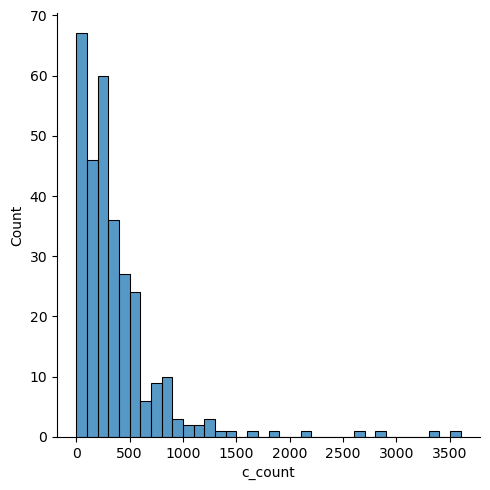

In [35]:
sns.displot(df_parag,x='c_count')

In [45]:
df_selection['url'][94]

'https://lemediaen442.fr/bilar-nous-approchons-bien-de-lechec-et-mat-si-rien-ne-vient-les-en-empecher/'

In [44]:
df_parag.sort_values('c_count',ascending=False).head(30)

,url,url_h,num_article,num_parag,paragraph,c_count
188,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,6,Bilar : Je pense que l’engouement des Gilets J...,3604
19,https://lezarceleurs.blogspot.com/2022/05/mort...,66b9cb7b592c322ab9e35348a884a3e22319d249,2,3,Il est enjoint à l’Etat et à la SA Orange \nd’...,3382
194,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,12,"Bilar : Il y a des groupes, des fraternités, d...",2874
185,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,3,Bilar : Bonjour Yoann et merci pour l’invitati...,2683
93,https://www.francesoir.fr/opinions-tribunes/co...,299f73518f44af38b75979464c49ee0656db2c2e,5,30,[1] https://www.francesoir.fr/opinions-tribune...,2176
200,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,18,"Bilar : Dans une situation d’injustice, les pr...",1902
223,https://reseauinternational.net/voir-les-corro...,9d618d02c4805676d1b0b18602b8e8602a64e60f,95,3,"Maintenant, nous pénétrons dans les origines d...",1637
123,https://www.bvoltaire.fr/entretien-exclusif-he...,0a386f54436dfb47169d1cb0557dfc37782e0824,10,3,Helen Joyce. Le « phénomène trans » commence a...,1412
54,https://reseauinternational.net/les-projets-de...,2a5478f5ef32fabbc7f8421cdc7f944a1f3e5c59,4,6,"Le Forum des nations libres de l’après-Russie,...",1371
197,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,15,"Bilar : Effectivement, ils savent appliquer av...",1238


In [36]:
df_parag_shuffle = df_parag.sample(frac=1,random_state=_rs)

In [37]:
df_parag_shuffle

,url,url_h,num_article,num_parag,paragraph,c_count
180,https://www.profession-gendarme.com/essonne-le...,382bac9a954453809b94369c779d2a6ec96cc030,96,7,"Grâce au flair des gendarmes, quatre suspects ...",259
154,https://www.profession-gendarme.com/un-colonel...,839b23164253eb0b28104a52276401bef2bd850f,89,4,"Juriste, Jacques-Charles Fombonne, 58 ans, qui...",244
111,https://www.profession-gendarme.com/un-medecin...,ccfa0d693f3037abbe36673cec68157f70effc29,8,6,Il a rapidement développé un « brouillard céré...,91
247,https://reseauinternational.net/voir-les-corro...,9d618d02c4805676d1b0b18602b8e8602a64e60f,95,27,« Or la police n’est pas d’abord « la force pu...,652
60,https://reseauinternational.net/les-projets-de...,2a5478f5ef32fabbc7f8421cdc7f944a1f3e5c59,4,12,Dans la partie centrale de l’actuelle Fédérati...,1019
...,...,...,...,...,...,...
188,https://lemediaen442.fr/bilar-nous-approchons-...,3d743cc73ab6572faf0f6e6ccfc1eb5ee29f8537,94,6,Bilar : Je pense que l’engouement des Gilets J...,3604
71,https://www.francesoir.fr/opinions-tribunes/co...,299f73518f44af38b75979464c49ee0656db2c2e,5,8,Depuis le début de la campagne d’injections ma...,128
106,https://www.profession-gendarme.com/un-medecin...,ccfa0d693f3037abbe36673cec68157f70effc29,8,1,Un lieutenant-colonel et médecin militaire de ...,243
270,https://reseauinternational.net/voir-les-corro...,9d618d02c4805676d1b0b18602b8e8602a64e60f,95,50,"Un enfant le crie, un enfant ne le croit plus ...",55


In [38]:
df_parag_shuffle.to_csv('data/tmp/230924-ObsInfo2309Selection.csv',index=False)

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [ ]:
import os
import openai

In [ ]:
openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")


In [ ]:
model_list = openai.Model.list()

In [ ]:
[model['id'] for model in model_list['data']]

In [14]:
[1,2] + [3,4]

[1, 2, 3, 4]